m_y -306
m_z -38
chi_y -15
chi_z 0
m_y -284
m_z -120
chi_y -15
chi_z 0


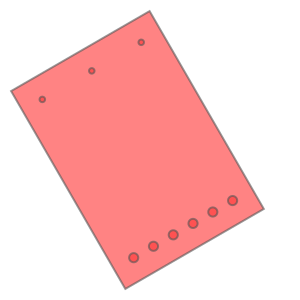

In [1]:
import math

from shapely import Polygon

from structuralcodes import codes, materials
from structuralcodes.geometry import SurfaceGeometry
from structuralcodes.sections._generic import GenericSection
from structuralcodes.sections._reinforcement import add_reinforcement_line

# from structuralcodes.plots.section_plots import draw_section_response,draw_section,get_stress_point


codes.set_design_code(design_code='ec2_2004')
# Create materials
concrete = materials.concrete.create_concrete(fck=25)
reinforcemnet = materials.reinforcement.create_reinforcement(
    fyk=500,
    Es=200000,
    density=7850,
    ftk=500,
    epsuk=0.07,
)
# Create section
poly = Polygon(((0, 0), (350, 0), (350, 500), (0, 500)))
geo = SurfaceGeometry(poly, concrete)
geo = add_reinforcement_line(geo, (50, 450), (300, 450), 12, reinforcemnet, n=3)
geo = add_reinforcement_line(geo, (50, 50), (300, 50), 20, reinforcemnet, n=6)
sec = GenericSection(geo)
#sec.geometry = sec.geometry.translate(-sec.gross_properties.cy,-sec.gross_properties.cz)
sec.geometry = sec.geometry.translate(-175,-250)


n = 0 * 1e3
my = -284 * 1e6
mz = -120 * 1e6
theta_deg = 30
#res = sec.section_calculator.calculate_strain_profile(n, my, mz)
#print(res)



#ESTO devuelve my mz en ejes globales!!!!
res2 = sec.section_calculator.calculate_bending_strength(
    theta_deg * math.pi / 180, 0
)
print('m_y', round(res2.m_y / 1e6))
print('m_z', round(res2.m_z / 1e6))
print('chi_y', round(res2.chi_y * 1e6))
print('chi_z', round(res2.chi_z * 1e6))


# ESTO devuelve my mz en ejes rotados!!!!
rot_sec = GenericSection(geo.rotate(theta_deg * math.pi / 180))
res2 = rot_sec.section_calculator.calculate_bending_strength(0, 0)
print('m_y', round(res2.m_y / 1e6))
print('m_z', round(res2.m_z / 1e6))
print('chi_y', round(res2.chi_y * 1e6))
print('chi_z', round(res2.chi_z * 1e6))


#res = sec.section_calculator.calculate_strain_profile(n, my, mz)
#print(res)

rot_sec.geometry

m_y -322
m_z 0
chi_y -24.594
chi_z 0.0
eps 2.648
m_y -87
m_z -125
chi_y -42
chi_z 0


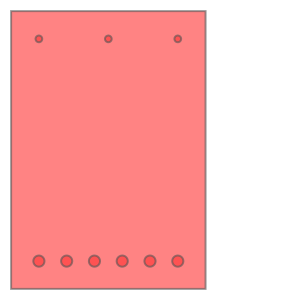

In [2]:
#ESTO devuelve my mz en ejes globales!!!!
res2 = sec.section_calculator.calculate_bending_strength(0, 0)
print('m_y', round(res2.m_y / 1e6))
print('m_z', round(res2.m_z / 1e6))
print('chi_y', round(res2.chi_y * 1e6,3))
print('chi_z', round(res2.chi_z * 1e6,3))
print('eps', round(res2.eps_a * 1e3,3))

#ESTO devuelve my mz en ejes globales!!!!
res2 = sec.section_calculator.calculate_bending_strength(math.pi/2, 0)
print('m_y', round(res2.m_y / 1e6))
print('m_z', round(res2.m_z / 1e6))
print('chi_y', round(res2.chi_y * 1e6))
print('chi_z', round(res2.chi_z * 1e6))
sec.geometry


---------
n 51.71594313156686
my -153.2467714291335
mz -90.36663854921913
---------
n -0.5148575178254395
my -188.91051888617932
mz 2.3134866227922514e-14


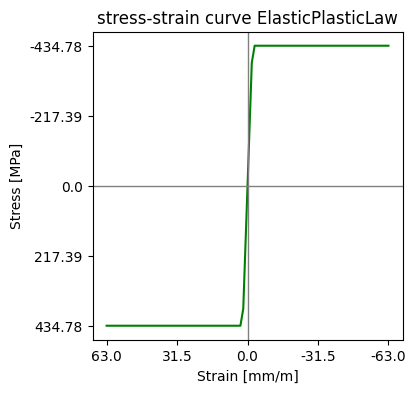

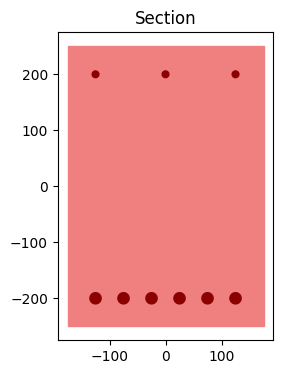

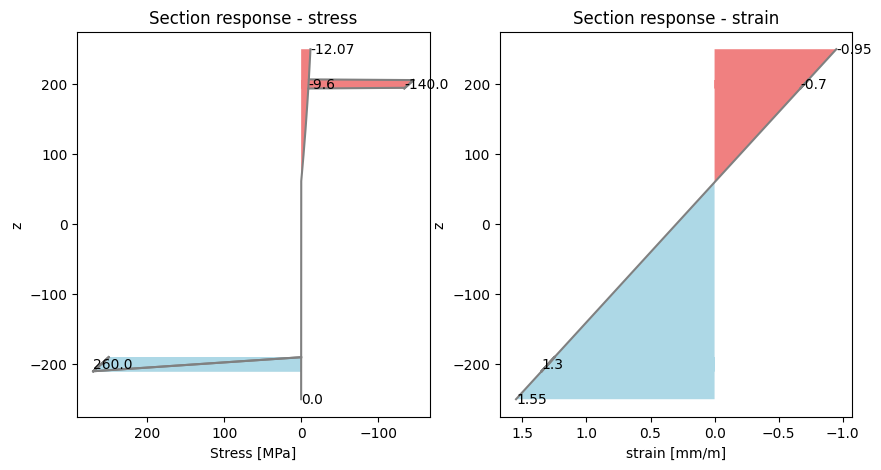

z neutral axis = 60.0


In [5]:
from structuralcodes.plots import section_plots 
eps0 = 1.85e-3
chiy = -11.47e-6
chiz = -33.45e-6

n, my, mz, j_ = (
    sec.section_calculator.integrator.integrate_strain_response_on_geometry(
        sec.geometry, (eps0, chiy, chiz)
    )
)
print('---------')
print('n', n / 1e3)
print('my', my / 1e6)
print('mz', mz / 1e6)
sec.geometry

eps0 = 0.30e-3
chiy = -5e-6
chiz = 0e-6
n, my, mz, j_ = (
    sec.section_calculator.integrator.integrate_strain_response_on_geometry(
        sec.geometry, (eps0, chiy, chiz)
    )
)
print('---------')
print('n', n / 1e3)
print('my', my / 1e6)
print('mz', mz / 1e6)
section_plots.draw_constitutive_law(sec.geometry.point_geometries[0].material)
section_plots.draw_section(sec)
section_plots.draw_section_response(sec,eps0,chiy)


Copia de pruebas.py

In [15]:

eps0 = 1.85e-3
chiy = -11.47e-6
# chiz = -33.45e-6
chiz = 10e-6

n, my, mz, j_ = (
    sec.section_calculator.integrator.integrate_strain_response_on_geometry(
        sec.geometry, (eps0, chiy, chiz)
    )
)

print('-----integrate_strain_response----')
print('n', n / 1e3)
print('my', my / 1e6)
print('mz', mz / 1e6)
# draw_section_response3D(sec, eps0, chiy, chiz)
n = 0 * 1e3
strain = sec.section_calculator.find_equilibrium_fixed_curvatureYZ(
    sec.geometry, n, chiy, chiz, 0
)
print('---------Strain')
print('eps', strain[0] * 1e3)
print('chiy', strain[1] * 1e6)
print('chiz', strain[2] * 1e6)

eps0 = 1.85e-3
chiy = -34 * 1e-6
chiz = 0 * 1e-6
n = 0 * 1e3
strain = sec.section_calculator.find_equilibrium_fixed_curvature(
    sec.geometry, n, chiy, 0
)
print('---------Strain')
print('eps', strain[0] * 1e3)
print('chiy', strain[1] * 1e6)
print('chiz', strain[2] * 1e6)

strain = sec.section_calculator.find_equilibrium_fixed_curvatureYZ(
    sec.geometry, n, chiy, chiz, 0
)
print('---------Strain')
print('eps', strain[0] * 1e3)
print('chiy', strain[1] * 1e6)
print('chiz', strain[2] * 1e6)

strain = sec.section_calculator.find_equilibrium_fixed_curvatureYZ_2(
    sec.geometry, n, chiy, chiz, 0
)
print('---------Strain')
print('eps', strain[0] * 1e3)
print('chiy', strain[1] * 1e6)
print('chiz', strain[2] * 1e6)

n = 0 * 1e3
my = 0 * 1e6  # -150
mz = 30 * 1e6  # -100
# res = sec.section_calculator.calculate_strain_profile(n, my, mz)
# print(res)
# print('------strain_profile---')

-----integrate_strain_response----
n 452.6162188058461
my -231.72616475584832
mz 40.30557765982681
---------Strain
eps 0.8370511382818223
chiy -11.47
chiz 10.0


ValueError: Maximum number of iterations reached.
Last iteration reached a unbalance of:                 dn_a = 185916.53478722723 dn_b = 185916.53478722717)

TypeError: unsupported operand type(s) for +: 'MomentCurvatureResults' and 'MomentCurvatureResults'

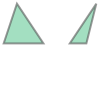

In [23]:
from shapely.geometry import Polygon, LineString, MultiPolygon

def cortar_parte_superior(polygon, y_corte):
    # Crear una línea horizontal de corte
    linea_corte = LineString([(polygon.bounds[0], y_corte), (polygon.bounds[2], y_corte)])
    
    # Crear un polígono por encima de la línea de corte
    poligono_superior = Polygon([(polygon.bounds[0], y_corte),
                                 (polygon.bounds[2], y_corte),
                                 (polygon.bounds[2], polygon.bounds[3]),
                                 (polygon.bounds[0], polygon.bounds[3])])
    
    # Intersección entre el polígono original y la parte superior
    resultado = polygon.intersection(poligono_superior)
    
    # Asegurarse de que el resultado es un polígono (y no una colección de geometrías)
    if isinstance(resultado, (Polygon, MultiPolygon)):
        return resultado
    else:
        return None

# Ejemplo de uso con un polígono cualquiera
polygon = Polygon([(0, 0), (2, -3), (4, 0), (3, -4), (1, -5), (-1, -3)])

# Definir la altura de corte
y_corte = -2

# Obtener la parte superior
parte_superior = cortar_parte_superior(polygon, y_corte)

parte_superior
